In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
att = np.load('imp_attributes.npy',allow_pickle=True)
att[:5]

array(['zip', 'number_of_properties', 'year', 'period', 'completions'],
      dtype=object)

In [5]:
df = pd.read_csv('MergedData.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,zip,sector,market_name,submarket_name,number_of_properties,metro_code,year,period,completions,vac_pct,...,commuters_by_subway_or_elevated,group_quarters,male_45_64_less_than_9_grade,male_45_64_grade_9_12,male_45_64_high_school,armed_forces,employed_agriculture_forestry_fishing_hunting_mining,employed_information,employed_public_administration,Liking
0,77072,Apartment,Houston,Alief/Kirkwood,47.0,HO,1990.0,Y,0.0,0.099,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
1,77072,Apartment,Houston,Alief/Kirkwood,47.0,HO,1991.0,Y,0.0,0.101,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
2,77072,Apartment,Houston,Alief/Kirkwood,47.0,HO,1992.0,Y,0.0,0.088,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
3,77072,Apartment,Houston,Alief/Kirkwood,47.0,HO,1993.0,Y,0.0,0.072,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
4,77072,Apartment,Houston,Alief/Kirkwood,47.0,HO,1994.0,Y,0.0,0.059,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0


In [8]:
df = df[att]

In [9]:
label_data = df[~(df['Liking'].isnull())]
unlabel_data  = df[df['Liking'].isnull()]
print(label_data.shape,unlabel_data.shape)
label_data['Liking'].value_counts()

(1488, 42) (66950, 42)


1.0    1209
0.0     279
Name: Liking, dtype: int64

In [10]:
label_data.head()

,zip,number_of_properties,year,period,completions,vac_pct,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment_pct_chg,...,median_year_structure_built,percent_income_spent_on_rent,million_dollar_housing_units,different_house_year_ago_same_city,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,commuters_by_subway_or_elevated,male_45_64_less_than_9_grade,armed_forces,Liking
0,77072,47.0,1990.0,Y,0.0,0.099,NaN,NaN,NaN,0.051118,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
1,77072,47.0,1991.0,Y,0.0,0.101,0.040,-0.2,0.0,0.000846,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
2,77072,47.0,1992.0,Y,0.0,0.088,0.032,1.4,0.0,0.007721,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
3,77072,47.0,1993.0,Y,0.0,0.072,0.014,1.7,0.0,0.022941,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
4,77072,47.0,1994.0,Y,0.0,0.059,0.023,1.4,0.0,0.028646,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0


In [11]:
for i in label_data.columns:
    if label_data[i].dtype =='O':
        print(i,' - ',label_data[i].nunique(),' : ',label_data[i].unique())

period  -  2  :  ['Y' 'Y-B']


In [12]:
for i in label_data:
    if label_data[i].nunique()<2:
        label_data = label_data.drop(i,axis=1)
print(label_data.shape)
label_data.head()

(1488, 42)


,zip,number_of_properties,year,period,completions,vac_pct,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment_pct_chg,...,median_year_structure_built,percent_income_spent_on_rent,million_dollar_housing_units,different_house_year_ago_same_city,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,commuters_by_subway_or_elevated,male_45_64_less_than_9_grade,armed_forces,Liking
0,77072,47.0,1990.0,Y,0.0,0.099,NaN,NaN,NaN,0.051118,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
1,77072,47.0,1991.0,Y,0.0,0.101,0.040,-0.2,0.0,0.000846,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
2,77072,47.0,1992.0,Y,0.0,0.088,0.032,1.4,0.0,0.007721,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
3,77072,47.0,1993.0,Y,0.0,0.072,0.014,1.7,0.0,0.022941,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0
4,77072,47.0,1994.0,Y,0.0,0.059,0.023,1.4,0.0,0.028646,...,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0,0.0


In [13]:
data = label_data.drop('Liking',axis=1)
target = label_data['Liking']

In [14]:
data.head()

,zip,number_of_properties,year,period,completions,vac_pct,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment_pct_chg,...,housing_built_1939_or_earlier,median_year_structure_built,percent_income_spent_on_rent,million_dollar_housing_units,different_house_year_ago_same_city,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,commuters_by_subway_or_elevated,male_45_64_less_than_9_grade,armed_forces
0,77072,47.0,1990.0,Y,0.0,0.099,NaN,NaN,NaN,0.051118,...,171.0,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0
1,77072,47.0,1991.0,Y,0.0,0.101,0.040,-0.2,0.0,0.000846,...,171.0,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0
2,77072,47.0,1992.0,Y,0.0,0.088,0.032,1.4,0.0,0.007721,...,171.0,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0
3,77072,47.0,1993.0,Y,0.0,0.072,0.014,1.7,0.0,0.022941,...,171.0,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0
4,77072,47.0,1994.0,Y,0.0,0.059,0.023,1.4,0.0,0.028646,...,171.0,1978.0,35.0,29.0,6161.0,91.0,37.0,0.0,1801.0,0.0


In [15]:
data.isna().sum().sum()

58

In [16]:
for i in data:
    if data[i].isnull().sum()>0:
        print(i)

asking_rent_pct_chg
abs_per_occ_stk_pct
construction_per_absorption


In [17]:
cat_cols = [ ]
for i in label_data.columns:
    if label_data[i].dtypes == 'O':
        cat_cols.append(i)
cat_cols

['period']

In [18]:
num_cols = data.columns.drop(cat_cols)
num_cols[:5]

Index(['zip', 'number_of_properties', 'year', 'completions', 'vac_pct'], dtype='object')

## PipeLine

In [19]:
pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
    ('rob_num', StandardScaler())
])

pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='most_frequent', add_indicator=False, fill_value='missing')),
    ('ohe_cat', OneHotEncoder())
])

ct = ColumnTransformer([
    ('pp_num', pp_num, num_cols),
    ('pp_cat', pp_cat, cat_cols)
])

In [20]:
pipe_final = Pipeline([
    ('ct_step', ct),
    ('model', LogisticRegression())
])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.33, random_state=42,stratify=target)

In [22]:
pipe_final.fit(X_train,y_train)

Pipeline(steps=[('ct_step',
                 ColumnTransformer(transformers=[('pp_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rob_num',
                                                                   StandardScaler())]),
                                                  Index(['zip', 'number_of_properties', 'year', 'completions', 'vac_pct',
       'asking_rent_pct_chg', 'abs_per_occ_stk_pct',
       'construction_per_absorption', 'total_employment_pct_chg',
       'households_pct_chg',...
       'two_parents_mother_in_labor_force_families_with_young_children',
       'two_parents_not_in_labor_force_families_with_young_children',
       'commuters_by_subway_or_elevated', 'male_45_64_less_than_9_grade',
       'armed_forces'],
      dtype='object')),
                            

In [23]:
pipe_final.memory

In [24]:
y_pred = pipe_final.predict(X_test)

<AxesSubplot:>

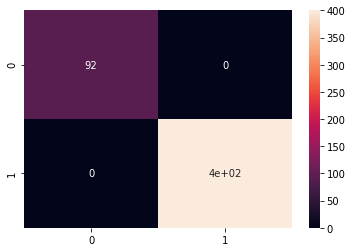

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [27]:
att_weights = pd.DataFrame([num_cols,pipe_final[1].coef_[0][:40]]).T
att_weights.columns = ['Attributes','Weights']
att_weights

,Attributes,Weights
0,zip,-0.64211
1,number_of_properties,0.150997
2,year,-0.022511
3,completions,0.133463
4,vac_pct,-0.016916
5,asking_rent_pct_chg,0.012978
6,abs_per_occ_stk_pct,0.109841
7,construction_per_absorption,-0.009351
8,total_employment_pct_chg,-0.00914
9,households_pct_chg,-0.00307


In [28]:
import joblib
joblib.dump(pipe_final,'pipeline2.pkl')

['pipeline2.pkl']